<h1 style="text-align: center;">Step and Impulse Response of a RLC Band Pass Filter</h1>
<p style="text-align: center;">Lab 5</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Use Laplace transforms to find the time-domain response of a RLC band pass filter to impulse and step inputs.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Code for the impulse response as a function for **Task 1**.  
[ ] Plot for the impulse response from **Prelab 5**.  
[ ] Plot for the impulse response from **Task 2**
  
##### Part 2
[ ] Code and plot for **Task 1**.  
[ ] Hand calculated final value theorem in a markdown cell from **Task 2**.   

### 3. Part 1
##### 3.1 Purpose
In this part of the lab, you will plot the impulse response of the circuit given in the prelab in two ways:  
1. Using the hand-solved time-domain impulse response from the prelab, implemented as a function.  
2. Using the **scipy.signal.impulse()** function with the s-domain transfer function from the prelab.  
##### 3.2 Tasks   
###### 3.2.1 Example code  
The following code implements the Laplace domain transfer function $H(s) = \frac{s + 2}{s^2 + 3s +8}$.

In [1]:
import scipy.signal as sig
import numpy as np

steps = 1e-5
t = np.arange(0, 1.2e-3 + steps, steps)

num = [1, 2] # creates the numerator s + 2
den = [1, 3, 8] # creates the denominator s**2 + 3s + 8

tout, yout = sig.impulse((num, den), T = t)

*Note: Both plots from this section should be identical.*  
1. Plot the impulse response $h(t)$ that you found by hand in the prelab assignment from $0 \le t \le 1.2$ ms.  

In [2]:
# Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [78]:
# Insert code for your step function and the Sine Method as a function here. I will write the definition line and description as a hint.
def step(t):
    """
    Creates a step function for duration t
    (taken from lab 2)
    
    Inputs:     t - time vector for determining the response
    Outputs:    return - step function based on the time vector
    """
    return np.array([1 if t[i] >= 0 else 0 for i in range(len(t))])

def sine_method(R, L, C, t):
    """
    Uses the sine method to find the impulse response of a given RLC filter,
    
    Inputs: R - Resistor value in Ohms
            L - Inductor value in Henries
            C - Capacitor value in Farads
            t - time vector to determine the response
            
    Outputs: y - impulse response calculated using the Sine Method
    """
    #Insert your code here
    # p = -(1/2*R*C) + 0.5*np.sqrt((1/((R*C)**2))-(4*(1/L*C)**2) +0*1j)
    # g = -0.5*(1/(R*C))**2 + (1/(2*R*C)) * np.sqrt((1/(R*C)**2)-(4*(1/L*C)**2) +0*1j)
    # w = np.angle(p)
    # a = np.abs(p)

    a = -(1/(2*R*C))    
    w = 0.5 * np.sqrt(((1/(R*C))**2 - 4*((1/np.sqrt(L*C)))**2) +0*1j)
    p = a + w
    g = p/(R*C)
    gMAG = np.abs(g)
    gANG = np.angle(g)

    y = (gMAG/np.abs(w)) * np.exp(a*t) * np.sin((np.abs(w)*t) + gANG) * step(t)
    return y

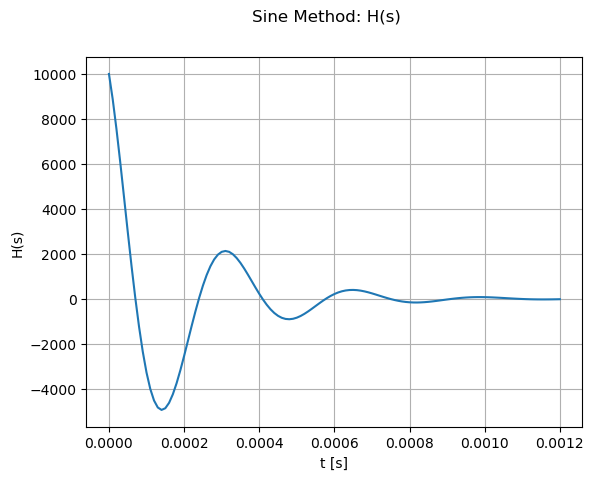

In [79]:
# Insert code calling your sine method function and plotting the impulse response here
R = 1000
L = 0.027
C = 100e-9

steps = 1e-5
t = np.arange(0, 1.2e-3+steps, steps)
yout = sine_method(R, L, C, t)

#plotting:
plt.figure()
plt.plot(t, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("Sine Method: H(s)")
plt.show()

2. Use the **scipy.signal.impulse()** function to plot the results from $0 \le t \le 1.2$ ms. 

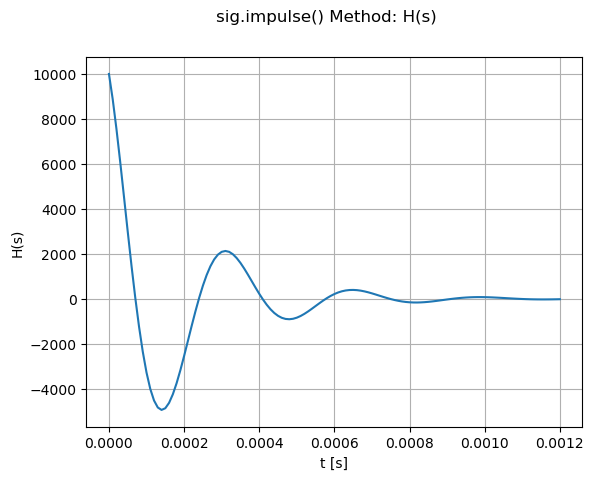

In [80]:
# Insert code using scipy.signal.impulse to find the impulse response here. This will be similar to the example code.
# Also, insert code plotting this response here.
steps = 1e-5
t = np.arange(0, 1.2e-3+steps, steps)
R = 1000
L = 27e-3
C = 100e-9

num = [1/(R*C), 0] #creates (1/RC)s
den = [1, 1/(R*C), 1/(L*C)] #creates s**2 + (1/RC)s + 1/LC

tout, yout = sig.impulse((num, den), T = t)

#plotting:
plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("sig.impulse() Method: H(s)")
plt.show()

### 4. Part 2
##### 4.1 Purpose
This section uses **scipy.signal.step()** function to plot the step response of the transfer function $H(s)$. Additionally, the final value theorem will be demonstrated.   
##### 3.2 Tasks   
1. Find the step response of $H(s)$ using the **scipy.signal.step()** function from $0 \le t \le 1.2$ ms.

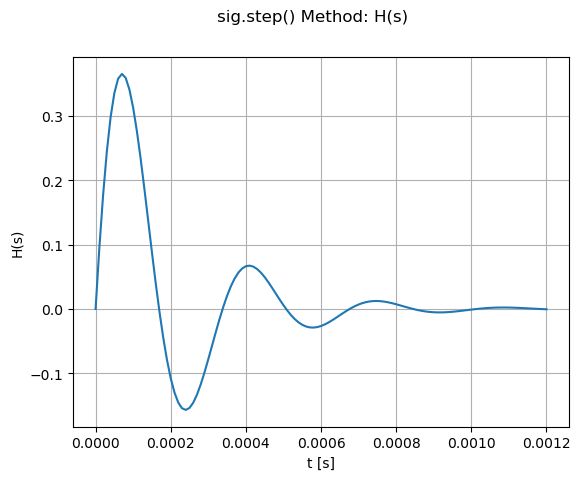

In [83]:
# Insert code using scipy.signal.step to find the step response here. 
# Also, insert code plotting this response here.

steps = 1e-5
t = np.arange(0, 1.2e-3+steps, steps)
R = 1000
L = 27e-3
C = 100e-9

num = [1/(R*C), 0] #creates (1/RC)s the extra zeros shift the graph to the right starting point
den = [1, 1/(R*C), 1/(L*C)] #creates s**2 + (1/RC)s + 1/LC

tout, yout = sig.step((num, den), T = t)

#plotting:
plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("sig.step() Method: H(s)")
plt.show()

2. Perform the final value theorem for the step response $H(s)u(s)$ in the Laplace domain.
>$FVT = \lim_{s\to\ 0 } sH(s) = \lim_{s\to\ 0 } \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}} = \frac{\frac{1}{RC}*0}{0^2 + \frac{1}{RC}*0 + \frac{1}{LC}} = 0$

### 5. Questions
1. Explain the result of the Final Value Theorem from **Part 2** **Task 2** in terms of the physical circuit components.  
>Based on the graph, as the function settles, it settles around the value 0. Thus, the limit as s approaches 0 will be 0. Also, since the numerator has an s value and the denominator has an s^2 value. As s decreases, both of those values will decrease as well making the denominator closer to zero faster than the numerator.

>Both the inductor and the capacitor charge once the circuit turns on. So both values start at 0 before time = 0. Since FVT is approaching 0, it makes sense that the graph and limit will be 0.
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>I have no feedback to give :\)